In [17]:
%matplotlib inline
%time from hikyuu.interactive import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

CPU times: user 79 µs, sys: 19 µs, total: 98 µs
Wall time: 103 µs


SZ


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


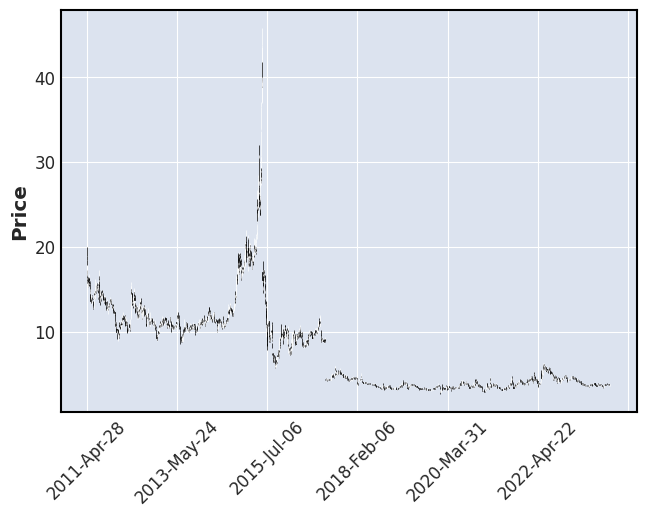

In [18]:
import mplfinance as mpf


name = 'sz002578'
s = sm[name]
print(s.market)

s = sm[name]
kdata = s.get_kdata(Query())
kdata

# 将hikyuu的hikyuu.KRecord 转化成 pandas.DataFrame
# hikyuu自带的方法如下
kdata = s.get_kdata(Query()).to_df()
mpf.plot(kdata, type='hollow_and_filled')


In [ ]:
data_map = {}
s = sm['bj873570']
print(s.market)
print(pd.Series(s.get_kdata(Query(-6)).close))
print(pd.Series(s.get_kdata(Query(-6)).close).pct_change())
for i, stock in enumerate(sm):
    # 不是A股的干掉
    if stock.type != constant.STOCKTYPE_A:
        continue

    if stock.market != 'SH' and stock.market != 'SZ':
        continue    
    kdata = stock.get_kdata(Query(-6))
    closing_prices = pd.Series(kdata.close)  # Convert to pandas Series
    datetime_array = []
    for v in k:
        datetime_array.append(v.datetime)

    # Calculate the daily returns
    closing_prices_length = len(closing_prices)
    if closing_prices_length == 0:
        print(stock.name)
        continue
    
    returns = closing_prices.pct_change()
    returns = returns[1:]

    # Store the values in the map
    for date, value in zip(datetime_array[1:], returns):
        if date not in data_map:
            data_map[date] = {}
        data_map[date][stock.name] = round(value, 5)

filtered_stocks = {}
for date, stocks in data_map.items():
    filtered_stocks[date] = {stock: value for stock, value in stocks.items() if value > 0.095}

for date, stocks in filtered_stocks.items():
    print(f"Date: {date}")
    print(f"Number of Stocks: {len(stocks)}")
    for stock, value in stocks.items():
        print(f"Stock: {stock}, Return: {value}")